29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/12
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.7670 - loss: 0.6711 - val_accuracy: 0.8547 - val_loss: 0.3972
Epoch 2/12
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8597 - loss: 0.3834 - val_accuracy: 0.8728 - val_loss: 0.3588
Epoch 3/12
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.8736 - loss: 0.3427 - val_accuracy: 0.8673 - val_loss: 0.3569
Epoch 4/12
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8841 - loss: 0.3128 - val_accuracy: 0.8730 - val_loss: 0.3476
Epoch 5/12
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8909 - loss: 0.2974 - val_accuracy: 0.8831 - val_loss: 0.3321
Epoch 6/12
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8953 - loss: 0.2776 - val_accuracy: 0.8744 - val_loss: 0.3423
Epoch 7/12
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9012 - loss: 0.2661 - val_accuracy: 0.8831 - val_loss: 0.3282
Epoch 8/12
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9043 - loss: 0.2544 -

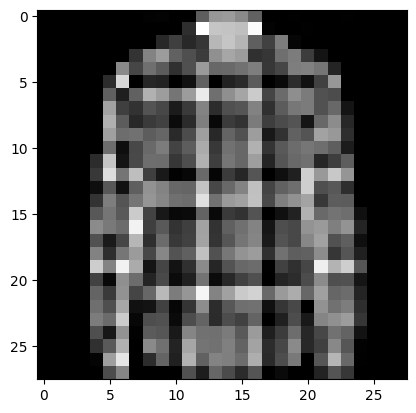

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
Predicción: 6


In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# 1. CARGA DEL DATASET
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Normalización (0-255 → 0-1)
x_train = x_train / 255.0
x_test  = x_test / 255.0

# 2. DEFINICIÓN DEL MODELO
model = models.Sequential([
    layers.Flatten(input_shape=(28,28)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 clases
])

# 3. COMPILACIÓN
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# 4. ENTRENAMIENTO
history = model.fit(
    x_train, y_train,
    epochs=12,
    validation_split=0.2
)

# 5. EVALUACIÓN
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"\nAccuracy en test = {test_acc}")

# 6. PREDICCIÓN EJEMPLO
i = 7
plt.imshow(x_test[i], cmap="gray")
plt.show()
pred = model.predict(x_test[i].reshape(1,28,28))
print("Predicción:", pred.argmax())
